Set the Dataset

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn category_encoders joblib jupyter

  Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.5-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab-4.4.1-py3-none-any.whl.metadata (16 kB)
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.

In [4]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

file_name = 'Metro_Interstate_Traffic_Volume.csv'

try:
    df = pd.read_csv(file_name)
    print("Dataset chargé")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please make sure the CSV file is in the correct directory or provide the full path.")

Dataset chargé


Set style of plot

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size

Exploration

In [4]:
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows:
   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  
0    scattered clouds  02-10-2012 09:00  
1       broken clouds  02-10-2012 10:00  
2     overcast clouds  02-10-2012 11:00  
3     overcast clouds  02-10-2012 12:00  
4       broken clouds  02-10-2012 13:00  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       482

Data processing

In [ ]:
#Convert 'date_time' to datetime objects

df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")# Extract time features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek # Monday=0, Sunday=6
df['day_name'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
print("\nTime features extracted (showing first 5 rows with new columns):")

print(df[['date_time', 'hour', 'day_name', 'month', 'year']].head())

print(df.head())

# Convertir la colonne 'temp' (Kelvin) en Celsius
df['temp'] = df['temp'] - 273.15





Time features extracted (showing first 5 rows with new columns):
            date_time  hour day_name  month  year
0 2012-10-02 09:00:00     9  Tuesday     10  2012
1 2012-10-02 10:00:00    10  Tuesday     10  2012
2 2012-10-02 11:00:00    11  Tuesday     10  2012
3 2012-10-02 12:00:00    12  Tuesday     10  2012
4 2012-10-02 13:00:00    13  Tuesday     10  2012
   traffic_volume holiday   temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  15.13      0.0      0.0          40       Clouds   
1            4516     NaN  16.21      0.0      0.0          75       Clouds   
2            4767     NaN  16.43      0.0      0.0          90       Clouds   
3            5026     NaN  16.98      0.0      0.0          90       Clouds   
4            4918     NaN  17.99      0.0      0.0          75       Clouds   

  weather_description           date_time  hour  day_of_week day_name  month  \
0    scattered clouds 2012-10-02 09:00:00     9            1  Tuesday     10   

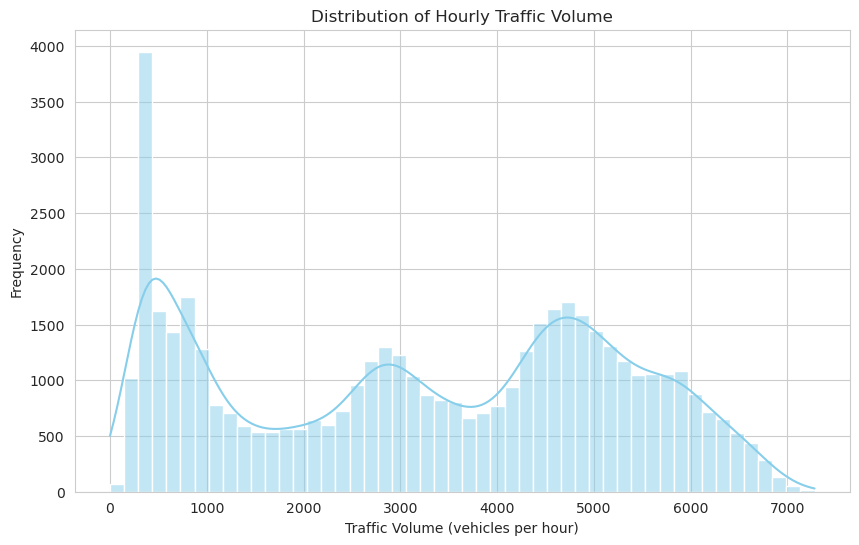

In [ ]:
#Traffic volume frenquency

plt.figure(figsize=(10, 6))
sns.histplot(df['traffic_volume'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Hourly Traffic Volume')
plt.xlabel('Traffic Volume (vehicles per hour)')
plt.ylabel('Frequency')
plt.show()

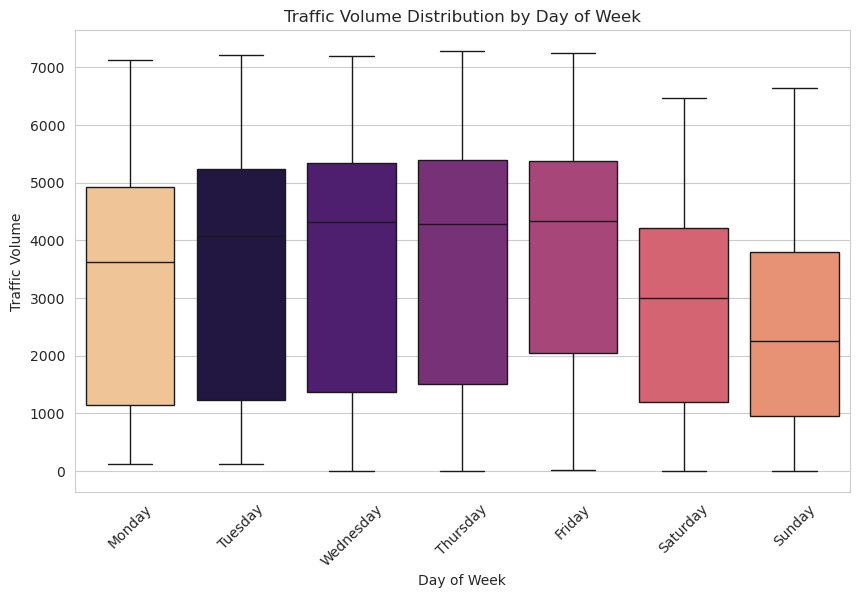

In [28]:
# Traffic Volume by Day of Week
plt.figure(figsize=(10, 6))
day_order = ["Monday", 
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday"]
sns.boxplot(
            data=df, x='day_name', y='traffic_volume',
            order=day_order, palette='magma',hue='day_name', legend=False
            )
plt.title('Traffic Volume Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()

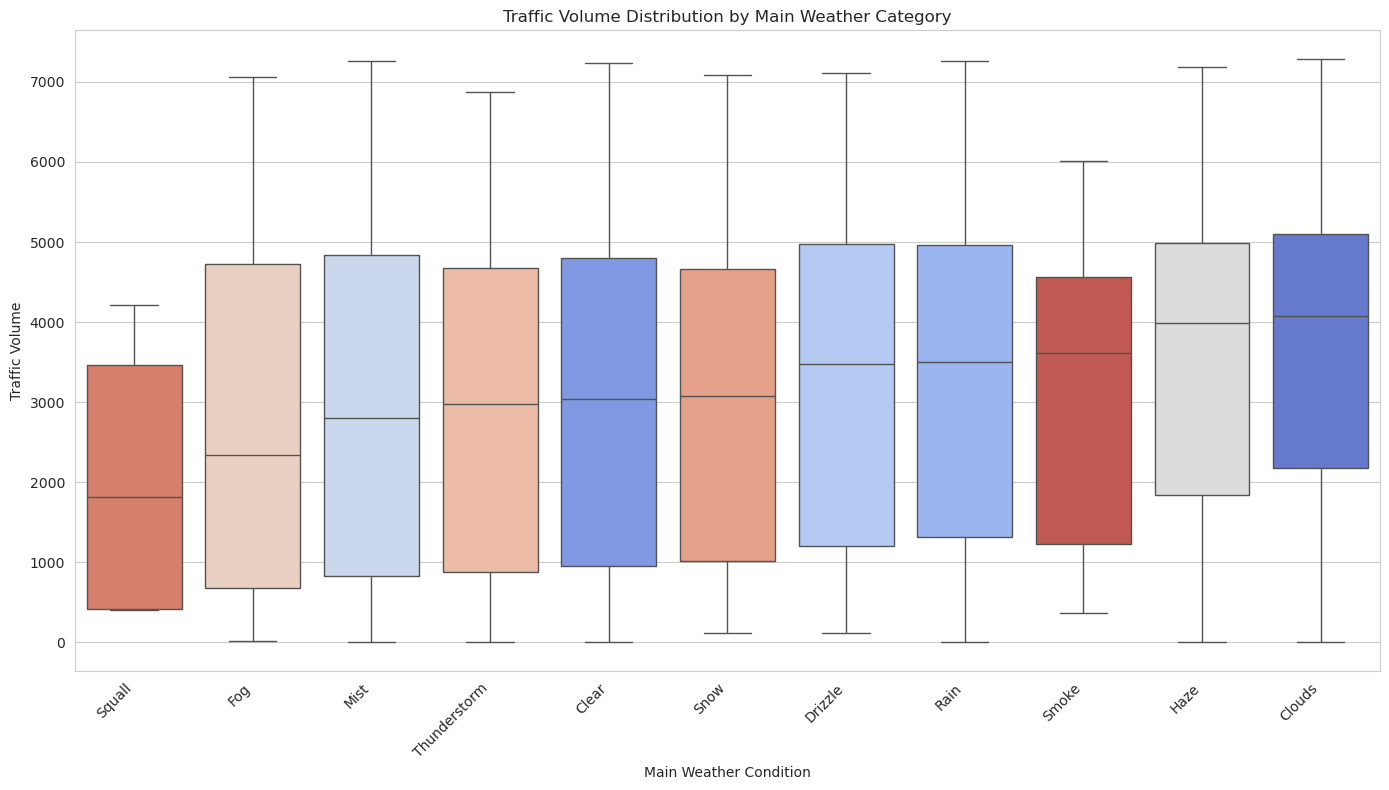

In [31]:
#Traffic vs Weather

plt.figure(figsize=(14, 8))
# Order categories by median traffic volume for better visualization
weather_order = (df.groupby('weather_main')['traffic_volume'].median()
                 .sort_values().index
)
sns.boxplot(
            data=df, x='weather_main', y='traffic_volume', order=weather_order,
            palette='coolwarm', hue='weather_main', legend=False
            )
plt.title('Traffic Volume Distribution by Main Weather Category')
plt.xlabel('Main Weather Condition')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

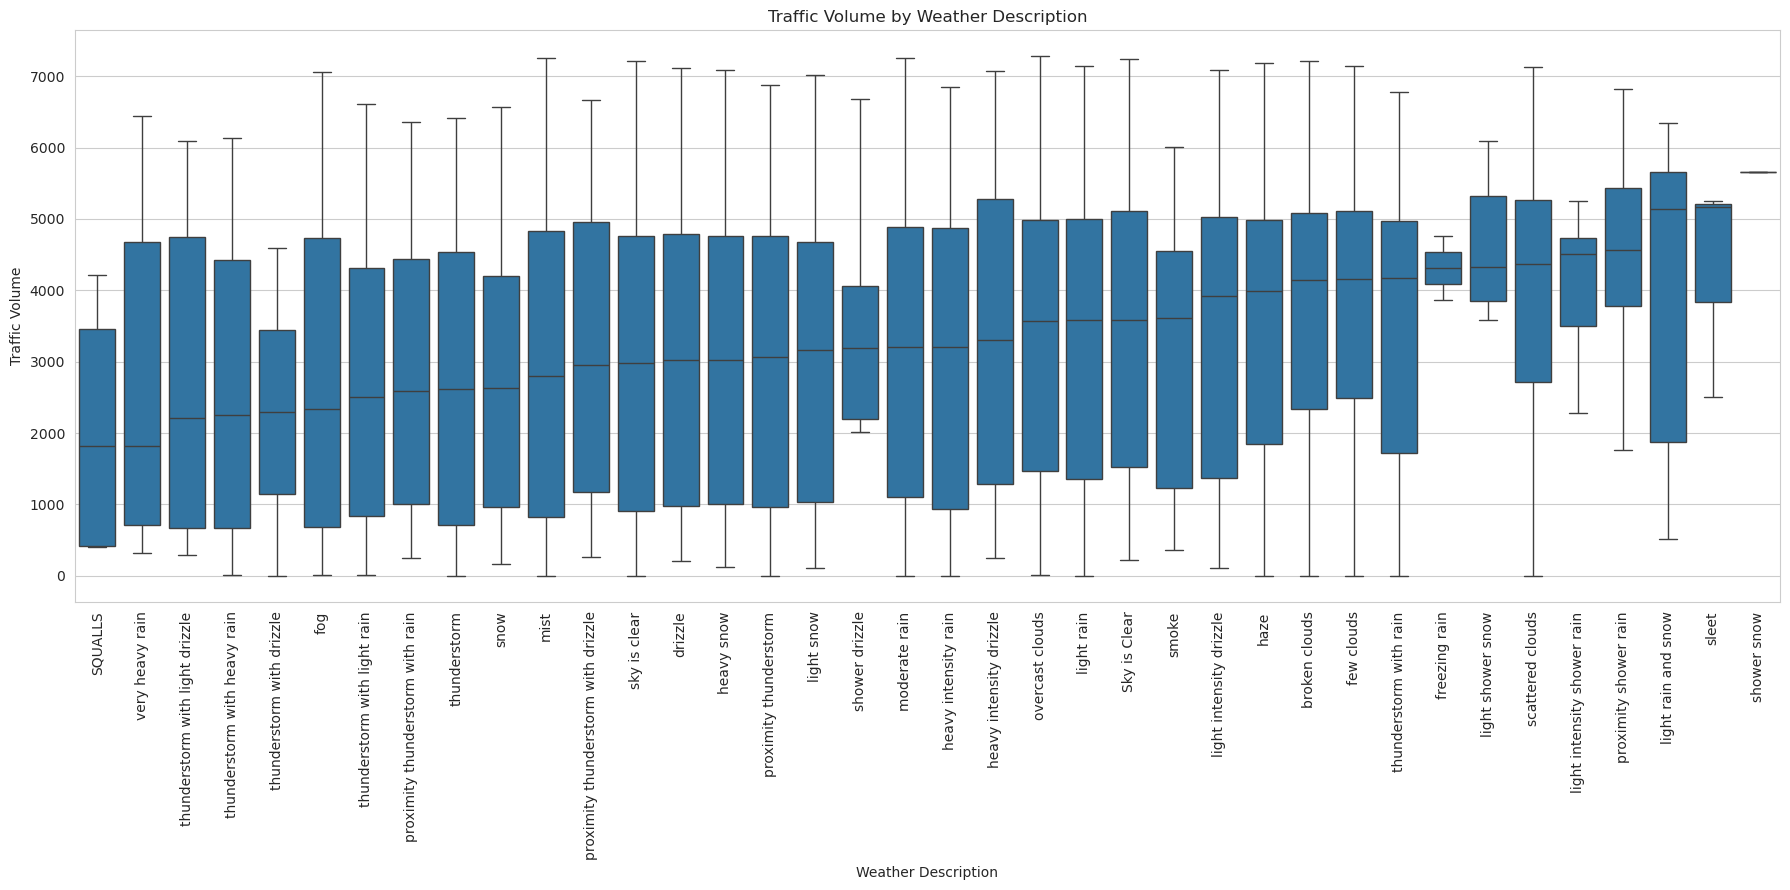

In [32]:
plt.figure(figsize=(18, 9))
desc_order = (
    df.groupby('weather_description')['traffic_volume']
    .median()
    .sort_values()
    .index
)
sns.boxplot(
    data=df,
    x='weather_description',
    y='traffic_volume',
    order=desc_order
)
plt.title('Traffic Volume by Weather Description')
plt.xlabel('Weather Description')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

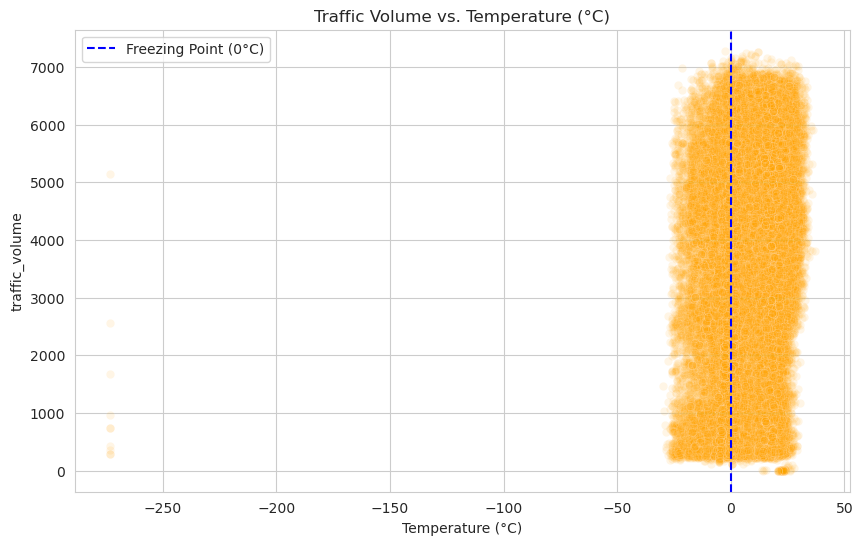

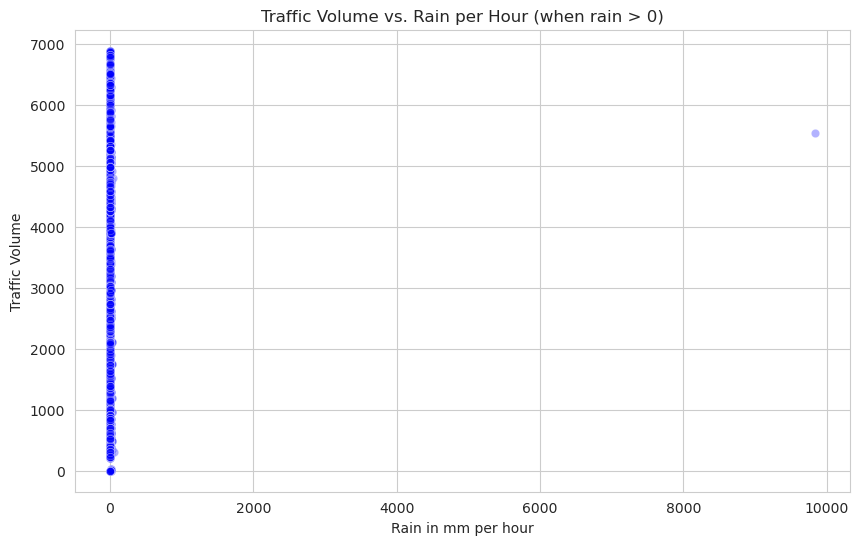

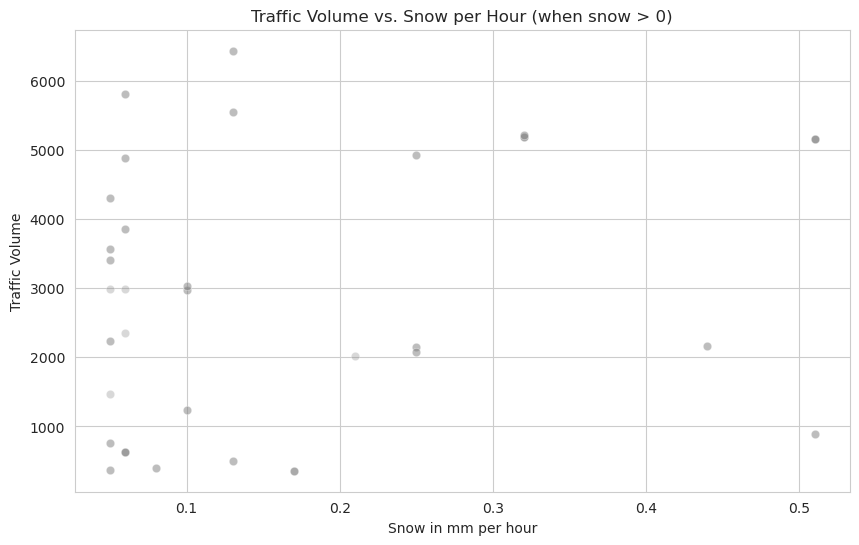

In [8]:
# Traffic Volume vs. Temperature (maintenant en Celsius)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='temp', y='traffic_volume', alpha=0.1, color='orange'
)
# --- Modifications ici ---
plt.title('Traffic Volume vs. Temperature (°C)') # Changé Kelvin en °C
plt.xlabel('Temperature (°C)')                  # Changé Kelvin en °C
# La note sur Kelvin n'est plus pertinente pour l'axe actuel
plt.axvline(
    0, color='blue', linestyle='--', label='Freezing Point (0°C)'
)
plt.legend()
plt.show()

# Traffic Volume vs. Rain (Focus on when it's raining)
plt.figure(figsize=(10, 6))
rain_df = df[df['rain_1h'] > 0]
if not rain_df.empty:
    # Use log scale for rain if skewed, check distribution first
    sns.scatterplot(
        data=rain_df, x='rain_1h', y='traffic_volume', alpha=0.3, color='blue'
    )
    plt.title('Traffic Volume vs. Rain per Hour (when rain > 0)')
    plt.xlabel('Rain in mm per hour')
    plt.ylabel('Traffic Volume')
    # plt.xscale('log')  # Optional: If rain values are heavily skewed
    plt.show()
else:
    print("No rain data points (rain_1h > 0) to plot.")


# Traffic Volume vs. Snow (Focus on when it's snowing)
plt.figure(figsize=(10, 6))
snow_df = df[df['snow_1h'] > 0]
if not snow_df.empty:
    sns.scatterplot(
        data=snow_df, x='snow_1h', y='traffic_volume', alpha=0.3, color='grey'
    )
    plt.title('Traffic Volume vs. Snow per Hour (when snow > 0)')
    plt.xlabel('Snow in mm per hour')
    plt.ylabel('Traffic Volume')
    plt.show()
else:
    print("No snow data points (snow_1h > 0) to plot.")


**Feature engineering**

Améliorer la performance du modèle : En créant des features plus pertinentes, tu aides le modèle à mieux "comprendre" les relations dans les données et donc à faire des prédictions plus précises. La qualité des features est essentielle


Extraire l'information pertinente : Transformer les données pour en faire ressortir les aspects importants pour la prédiction


Adapter les données au modèle : La plupart des algorithmes de Machine Learning nécessitent des données d'entrée dans un format spécifique (souvent numérique)

Le Feature Engineering inclut ces transformations.

Créer de nouvelles variables : Combiner ou modifier des features existantes pour capturer des relations plus complexes ou des informations implicites

In [11]:
#Exploitation of temporal informations

##Creation of "weekend" feature

# Créer une colonne 'is_weekend' (1 si weekend, 0 sinon)
df['is_weekend'] = df['day_of_week'].apply(
    lambda x: 1 if x >= 5 else 0
)
print("Feature 'is_weekend' créée.")
print(df[['day_name', 'is_weekend']].head())

## Creation of "peak traffic hours" feature

# Exemple : Heures de pointe matin (7-9h) et soir (16-18h)
def get_peak_hour(hour):
    if 7 <= hour < 10:
        return 'morning_peak'
    elif 16 <= hour < 19:
        return 'evening_peak'
    else:
        return 'off_peak'

df['peak_hour_category'] = df['hour'].apply(get_peak_hour)
print("\nFeature 'peak_hour_category' créée.")
print(df[['hour', 'peak_hour_category']].head())
# Tu devras ensuite encoder cette variable catégorielle (voir point 3)

# Créer une colonne 'season' basée sur le mois
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else: # 9, 10, 11
        return 'autumn'

df['season'] = df['month'].apply(get_season)
print("\nFeature 'season' créée.")
print(df[['month', 'season']].head())
# Encoder également cette variable (voir point 3)



Feature 'is_weekend' créée.
  day_name  is_weekend
0  Tuesday           0
1  Tuesday           0
2  Tuesday           0
3  Tuesday           0
4  Tuesday           0

Feature 'peak_hour_category' créée.
   hour peak_hour_category
0     9       morning_peak
1    10           off_peak
2    11           off_peak
3    12           off_peak
4    13           off_peak

Feature 'season' créée.
   month  season
0     10  autumn
1     10  autumn
2     10  autumn
3     10  autumn
4     10  autumn


In [ ]:
#Transformation of weather features

##Combine snow and rain
# Créer 'precipitation' (somme simple ou indicateur binaire)
df['precipitation'] = df['rain_1h'] + df['snow_1h']
# Ou un indicateur si > 0
df['is_precipitating'] = (df['precipitation'] > 0).astype(int)
print("\nFeatures 'precipitation' et 'is_precipitating' créées.")
print(df[['rain_1h', 'snow_1h', 'precipitation', 'is_precipitating']].head())



Features 'precipitation' et 'is_precipitating' créées.
   rain_1h  snow_1h  precipitation  is_precipitating
0      0.0      0.0            0.0                 0
1      0.0      0.0            0.0                 0
2      0.0      0.0            0.0                 0
3      0.0      0.0            0.0                 0
4      0.0      0.0            0.0                 0


In [13]:
#Binning weather

##temperature categories
# Exemple simple pour la température
bins = [-float('inf'), 0, 15, 25, float('inf')]
labels = ['freezing', 'cold', 'mild', 'hot']
df['temp_category'] = pd.cut(
    df['temp'], bins=bins, labels=labels, right=False
    )
print("\nFeature 'temp_category' créée.")
print(df[['temp', 'temp_category']].head())
# Encoder cette nouvelle variable (voir point 3)



Feature 'temp_category' créée.
    temp temp_category
0  15.13          mild
1  16.21          mild
2  16.43          mild
3  16.98          mild
4  17.99          mild


Encode category variable